# Project #7: Dimension Reduction

Due Friday, Nov 16th, 5pm.

1. In Project 4, you had previously used the minst digit data set to classify the images.  We would like to repeat the classification process, but this time, performing the classification using data that has been reduced.  

    1. Estimate the dimensionality of the data you wish to reduce.

    2. Experiment with how well the classification (your choice -- pick at least two) behaves with various ranked approximations.  You should pick at least three ranks to test: one that is smaller than the estimated dimensionality from (a), one that is approximately the estimated dimensionality, and lastly, the full rank approximation (i.e. as if no reduction was performed).
    
2. Consider the two data sets: "data/dataset_a.csv", "data/dataset_b.csv". The first two columns are the 2-dimensional data values, the third column is a label (either 0 or 1), that is useful for supervised learning, or dimension reduction using LDA.
    
    1. Please plot both datasets, using a different marker/color for each label, labelling the graph appropriately.
    2. Apply PCA and Fisher's Linear Discriminant Analysis to the two datasets (for PCA, ignore the class label).  Please explain the result.  In particular, be sure to address what is the projection direction of PCA and LDA on both datasets.
    
3. An approach for non-linear dimension is to explore Laplacian Eigenmaps of the data, see http://web.cse.ohio-state.edu/~belkin.8/papers/LEM_NC_03.pdf.  

    1. Read through this article, focusing on Section 1, Section 2, Section 6.1.  
    2. The code below generates and plots the classic swiss roll data set.  Construct the similarity (adjacency) graph for this data.  You can use either the $n$ nearest neighbor nodes, or pick and "$\epsilon$"-neighborhood, see page 5 of the above paper.
    3. Compute the graph Laplacian.  You should explore a few parameters (parameter $t$ on page 6 of the paper)
    4. finally, find the eigenvectors of the graph laplacian, and corresponding eigenvalues.  Project data into eigenspace, using the eigenvectors associated with the 2 smallest eigenvalues.  Plot what the data looks like in this projected space.

# Answer of Question 1

In this project, we are going to dimension reduction on several datasets. To begin with, we can import all the necessary library to support the project. Especially in this section, we are going to use the MNIST data set related to digits, so we have to add the library in order to use the dataset.

In [191]:
import pandas as pd
import numpy as np
from mnist import MNIST # library for MNIST
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

The dataset is based on MNIST digits by Yann Lecun which we can access in the website. We will use the following code to retrieve the dataset from the url.

In [4]:
import os
import gzip
from urllib.request import urlretrieve

#retrieve the data from the source
def download(filename, source='http://yann.lecun.com/exdb/mnist/'):
    print("Downloading %s" % filename)
    urlretrieve(source + filename, filename)

# define the functions for loading MNIST images and labels.
#function for loading the file with images
def load_mnist_images(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the inputs in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
    # The inputs are vectors now, reshape them to monochrome 2D images,
    # following the shape convention: (examples, channels, rows, columns)
    data = data.reshape(-1, 1, 28, 28)
    # The inputs come as bytes, convert them to float32 in range [0,1].
    return data / np.float32(256)

#function for loading the files with labels
def load_mnist_labels(filename):
    if not os.path.exists(filename):
        download(filename)
    # Read the labels in Yann LeCun's binary format.
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=8)
    # The labels are vectors of integers now.
    return data

#call the function and add the value into variable
X_train = load_mnist_images('train-images-idx3-ubyte.gz')
y_train = load_mnist_labels('train-labels-idx1-ubyte.gz')
X_test = load_mnist_images('t10k-images-idx3-ubyte.gz')
y_test = load_mnist_labels('t10k-labels-idx1-ubyte.gz')

#source: https://stackoverflow.com/questions/43149272/cannot-get-mnist-database-through-anaconda-jupyter
#Date taken: 10/12/2018

Then we can convert the variable that store the dataset both images and labels into an array.

In [5]:
train_images = np.asarray(X_train)
train_labels = np.asarray(y_train)
test_images = np.asarray(X_test)
test_labels = np.asarray(y_test)

## A. Estimate the Dimension Reduction

From the above 4 variables, we are going to use the train_images and train_labels only to do the dimension reduction. The following code will check the shape of the dimension.

In [7]:
#check the dimension for train_images in a new variable X
X = train_images
X.shape

(60000, 1, 28, 28)

Since there are 4 dimension array, we can to reshape it into 2 dimension array in order to proceed it to use PCA. To reshape it we can multiply the other column except the first column into one column. With this, the array will become 2D array. We can check the dimension again using shape function.

In [10]:
#reshape the dimension, 4D to 2D
nsamples, nx, ny, nz = X.shape
X_data = X.reshape((nsamples,nx*ny*nz))
X_data.shape

(60000, 784)

Below we will check the dimension for variable train_labels.

In [57]:
#check the dimension for train_labels in a new variable y
yx = train_labels
yx.shape

(60000,)

Now our variables is ready, we can implement it into PCA function to reduce the dimensionality. Since a better result is the one with the reduction ratio around 75 percent to 95 percent. We are going to choose the ratio of 80 percent of reduction ratio. This means that the data will keep 80 percent of its variance.

In [15]:
pca = PCA(n_components=0.80) #this defines reduction ratio
pca.fit(X_data) # fit to data
X_pca = pca.transform(X_data) # reduction
print(X_pca.shape)

(60000, 44)


As we can see on the above result, from a dimension of 60000x784 in the original dataset, we reduce the dimension to become 60000x44. We can see the comparison using the following code.

In [13]:
# Print the number of features
print('Original number of features:', X_data.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 784
Reduced number of features: 44


In [17]:
## View the ratio of explained variance
pca.explained_variance_ratio_

array([0.09704671, 0.07095984, 0.06169091, 0.05389423, 0.04868798,
       0.04312212, 0.03271929, 0.02883898, 0.02762023, 0.02357002,
       0.02109186, 0.02022991, 0.01715814, 0.01692114, 0.01578644,
       0.01482955, 0.01324558, 0.012769  , 0.01187261, 0.01152686,
       0.01066164, 0.01006713, 0.00953573, 0.00912543, 0.00883407,
       0.00839319, 0.00812579, 0.00786364, 0.00744732, 0.0069086 ,
       0.00658093, 0.0064815 , 0.00602614, 0.00586583, 0.00570022,
       0.00543629, 0.00505786, 0.00487858, 0.0048143 , 0.00472264,
       0.00456745, 0.00444836, 0.00418502, 0.00398216], dtype=float32)

## B. Visualize The Classification of Dimension Reduction

    B. Experiment with how well the classification (your choice -- pick at least two) behaves with various ranked approximations.  You should pick at least three ranks to test: one that is smaller than the estimated dimensionality from (a), one that is approximately the estimated dimensionality, and lastly, the full rank approximation (i.e. as if no reduction was performed).

After we have our estimate reduction, we can start to check other number of components to check to compare the classification between three different estimation.

#### 1) Ratio smaller than 80% (50%)

In [19]:
#smaller than 1A, 50% variance
pca2 = PCA(n_components=0.50) 
pca2.fit(X_data) # fit to data
X_pca2 = pca2.transform(X_data) # reduction
print(X_pca2.shape)

(60000, 11)


We will plot the first 2 digits in the following code to see the classification clearly.

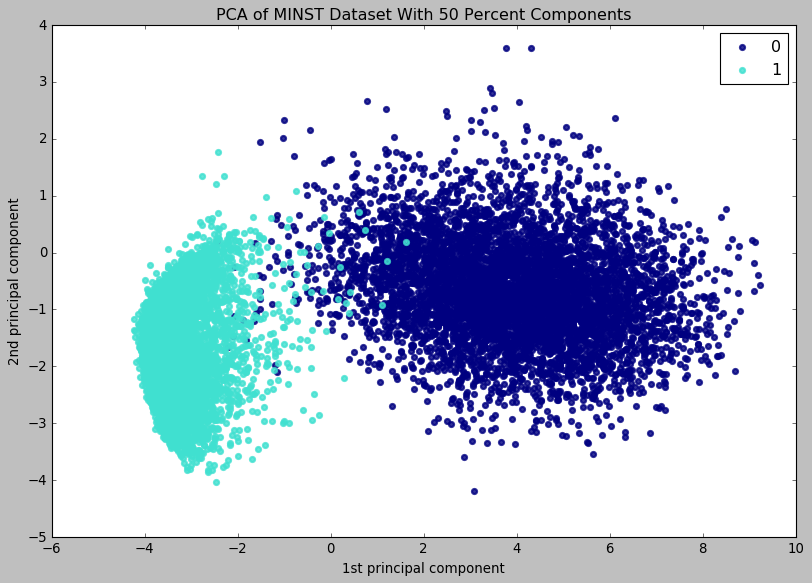

In [58]:
#plot the first 2 digits
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise']

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_pca2[y == i, 0], X_pca2[y == i, 1], color=color, alpha=.8, lw=2, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MINST Dataset With 50 Percent Components')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

We will plot all the digits 0 to 9 in the following code.

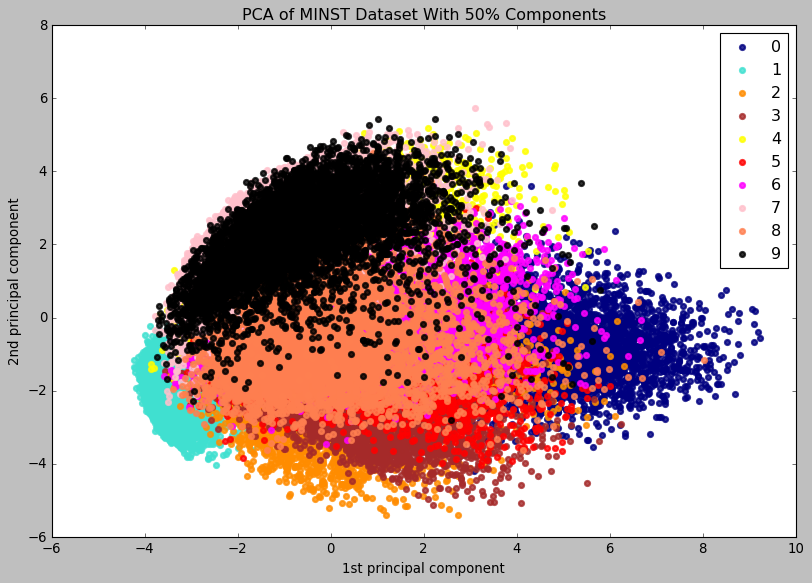

In [59]:
#Plot all the digits classification
plt.figure(figsize=(12,8))

colors = ['navy', 'turquoise', 'darkorange', 'brown', 'yellow', 'red', 'magenta', 'pink', 'coral', 'black']
for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=2, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MINST Dataset With 50% Components')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

#### 2) Ratio 80%

In [ ]:
#dimension on 1A
print(X_pca.shape)

In [ ]:
We will plot the first 2 digits in the following code to see the classification clearly.

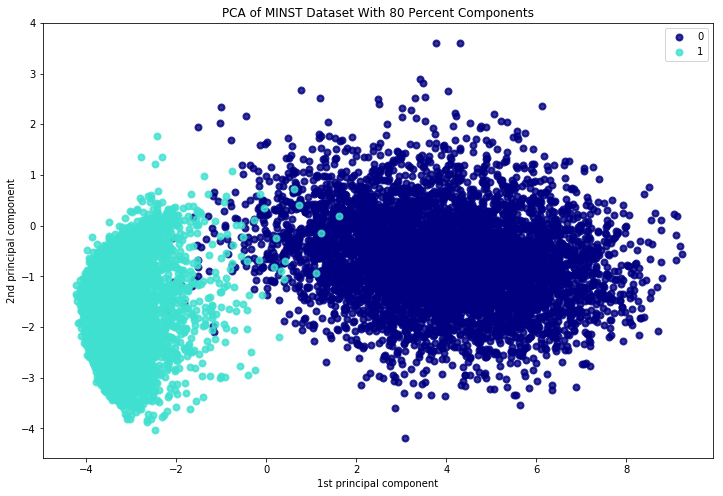

In [26]:
plt.figure(figsize=(12,8))
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]).astype(np.float)

colors = ['navy', 'turquoise']

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], color=color, alpha=.8, lw=2, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MINST Dataset With 80 Percent Components')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

We will plot all the digits 0 to 9 in the following code.

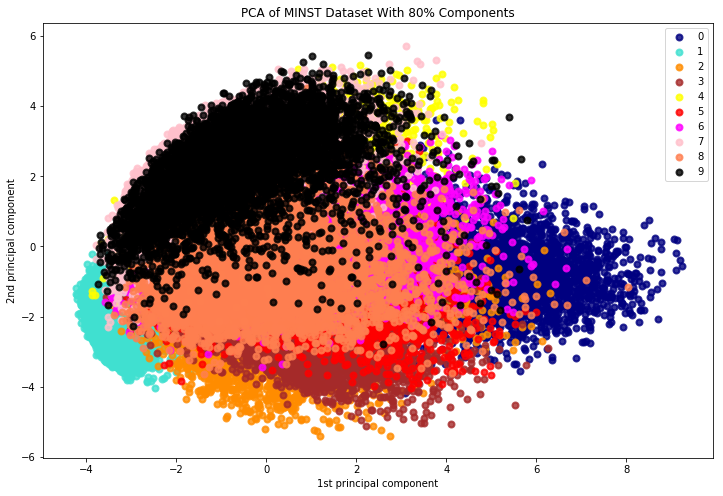

In [33]:
#Plot all the digits classification
plt.figure(figsize=(12,8))

colors = ['navy', 'turquoise', 'darkorange', 'brown', 'yellow', 'red', 'magenta', 'pink', 'coral', 'black']
for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(X_pca2[y == i, 0], X_pca2[y == i, 1], color=color, alpha=.8, lw=2, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MINST Dataset With 80% Components')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

#### 3) Ratio greater than 80% (99.9999%)

In [20]:
#greater than 1A, 99.9999% variance
pca3 = PCA(n_components=0.999999) 
pca3.fit(X_data) # fit to data
X_pca3 = pca3.transform(X_data) # reduction
print(X_pca3.shape)

(60000, 673)


We will plot the first 2 digits in the following code to see the classification clearly.

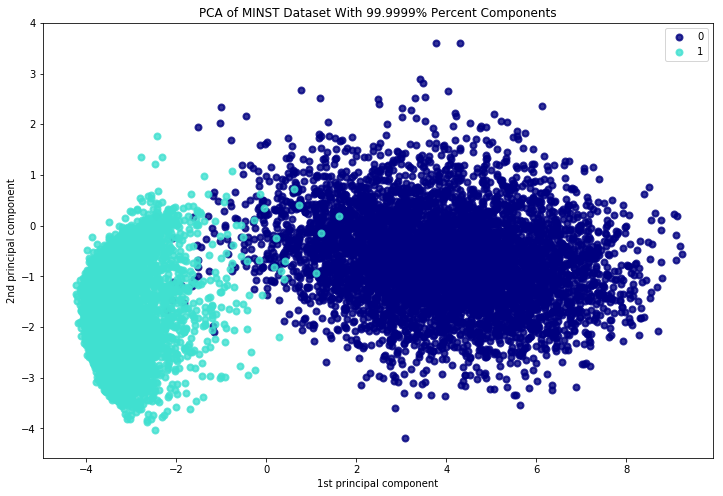

In [29]:
#plot the first 2 digits
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise']

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_pca3[y == i, 0], X_pca3[y == i, 1], color=color, alpha=.8, lw=2, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MINST Dataset With 99.9999% Percent Components')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

We will plot all the digits 0 to 9 in the following code.

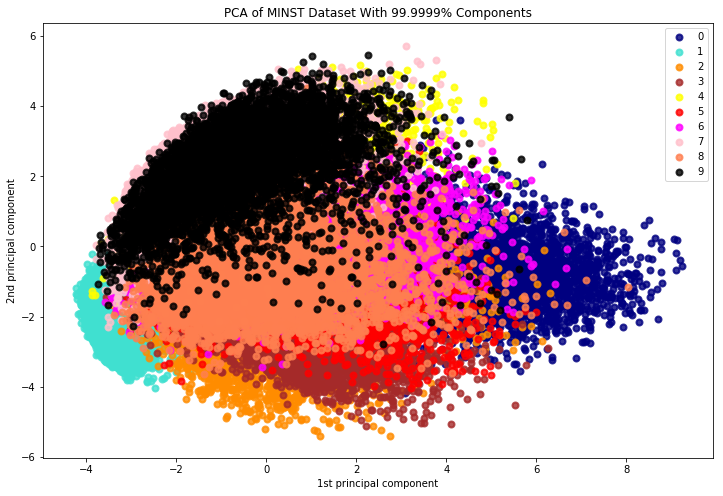

In [32]:
#Plot all the digits classification
plt.figure(figsize=(12,8))

colors = ['navy', 'turquoise', 'darkorange', 'brown', 'yellow', 'red', 'magenta', 'pink', 'coral', 'black']
for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(X_pca3[y == i, 0], X_pca3[y == i, 1], color=color, alpha=.8, lw=2, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MINST Dataset With 99.9999% Components')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

#### 4) Full ratio (without reduction)

In [21]:
#greater than 1A, full n_components
pca4 = PCA(n_components=784) 
pca4.fit(X_data) # fit to data
X_pca4 = pca4.transform(X_data) # reduction
print(X_pca4.shape)

(60000, 784)


We will plot the first 2 digits in the following code to see the classification clearly.

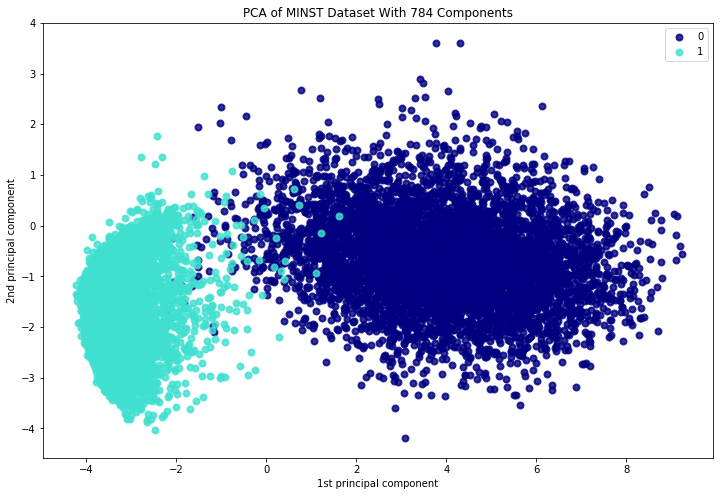

In [28]:
#plot the first 2 digits
plt.figure(figsize=(12,8))
colors = ['navy', 'turquoise']

for color, i in zip(colors, [0, 1]):
    plt.scatter(X_pca4[y == i, 0], X_pca4[y == i, 1], color=color, alpha=.8, lw=2, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MINST Dataset With 784 Components')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

We will plot all the digits 0 to 9 in the following code.

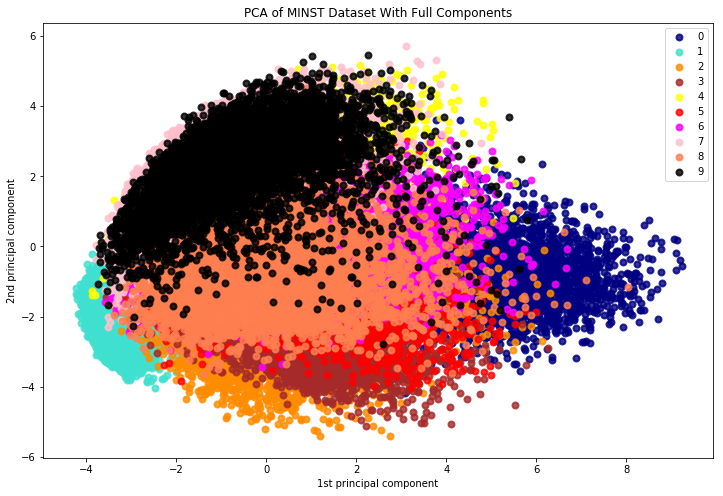

In [31]:
#Plot all the digits classification
plt.figure(figsize=(12,8))

colors = ['navy', 'turquoise', 'darkorange', 'brown', 'yellow', 'red', 'magenta', 'pink', 'coral', 'black']
for color, i in zip(colors, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]):
    plt.scatter(X_pca4[y == i, 0], X_pca4[y == i, 1], color=color, alpha=.8, lw=2, label=i)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of MINST Dataset With Full Components')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

# Answer of Question 2

2. Consider the two data sets: "data/dataset_a.csv", "data/dataset_b.csv". The first two columns are the 2-dimensional data values, the third column is a label (either 0 or 1), that is useful for supervised learning, or dimension reduction using LDA.
    
    1. Please plot both datasets, using a different marker/color for each label, labelling the graph appropriately.
    2. Apply PCA and Fisher's Linear Discriminant Analysis to the two datasets (for PCA, ignore the class label).  Please explain the result.  In particular, be sure to address what is the projection direction of PCA and LDA on both datasets.

In this question we are going to use dataset_a and dataset_b to apply dimension reduction using both PCA and LDA. To begin, we can import the dataset into this project and set the header since the the dataset does not have any header. We also print out the first 5 rows in the dataset to have a look on how the data looks like.

The following code will import dataset_a, set the header and print out the first 5 rows.

In [36]:
colnames = ["X", "Y", "Label"]
dataA = pd.read_csv('data/dataset_a.csv', sep=",", names=colnames)
labA = dataA["Label"].unique()
dataA.head()

,X,Y,Label
0,0.040497,0.019591,1
1,0.550300,-0.036563,1
2,0.287870,0.030625,1
3,0.610600,-0.012989,1
4,0.404830,0.010734,1


The following code will import dataset_b, set the header and print out the first 5 rows.

In [37]:
#colnamesB = ["X", "Y", "Label"]
dataB = pd.read_csv('data/dataset_b.csv', sep=",", names=colnames)
labB = dataB["Label"].unique()
dataB.head()

,X,Y,Label
0,0.155060,2.4931,1
1,0.636230,-2.6004,1
2,0.366930,1.8192,1
3,0.458330,3.8111,1
4,0.067987,-6.3500,1


In [ ]:
We can take a look at the dimension of the data using the following code.

In [88]:
print ("Dimension of Data A", dataA.shape)
print ("Dimension of Data B", dataB.shape)

Dimension of Data A (400, 3)
Dimension of Data B (400, 3)


### A. Plot The Dataset

Now we will plot both of the dataset in order to have a visual interpretation of it. First, we will convert the data into an array.

In [39]:
dataA = np.asarray(dataA)
dataB = np.asarray(dataB)

Then we can separate the data based on its label (0 and 1) for each dataset.

In [40]:
#dataset A, filter based on label value
dat = dataA[dataA[:,2]==1]
dat0 = dataA[dataA[:,2]==0]

#dataset B, filter based on label value
datB = dataB[dataB[:,2]==1]
datB0 = dataB[dataB[:,2]==0]

Now, we can plot each of the dataset. The following code will plot the dataset A, and add appropriate label, marker and coloring in order to differentiate between label.

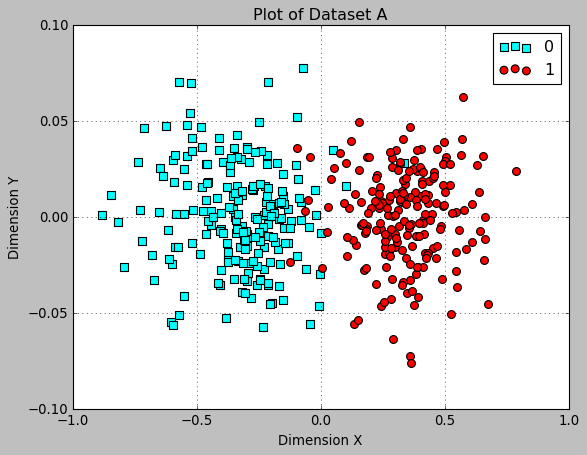

In [89]:
#plot of dataset A
plt.style.use('classic')
plt.scatter(dat0[:,0],dat0[:,1],c='aqua',marker='s', s=50, label="0")
#plt.scatter(dat0[:,1],dat0[:,0],c='aqua',marker='s', s=50, label="0")
plt.scatter(dat[:,0],dat[:,1],c='red',marker='o', s=50, label="1")
#plt.scatter(dat[:,1],dat[:,0],c='red',marker='o', s=50, label="1")
plt.legend()
plt.grid()
plt.xlabel('Dimension X')
plt.ylabel('Dimension Y')
plt.title('Plot of Dataset A')
plt.show()


Now, we can plot each of the dataset. The following code will plot the dataset B, and add appropriate label, marker and coloring in order to differentiate between label.

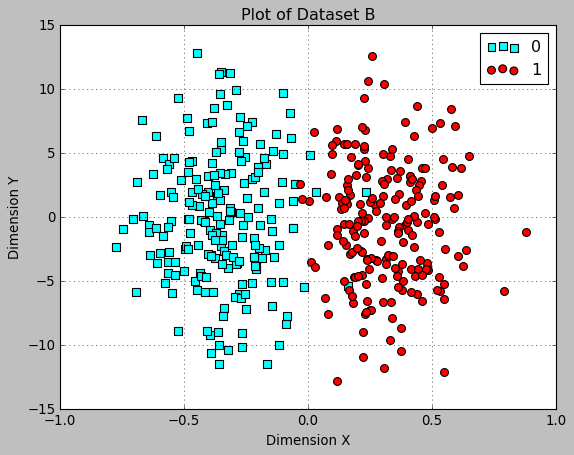

In [51]:
#plot of dataset B
plt.style.use('classic')
plt.scatter(datB0[:,0],datB0[:,1],c='aqua',marker='s', s=50, label="0")
plt.scatter(datB[:,0],datB[:,1],c='red',marker='o', s=50, label="1")
plt.legend()
plt.grid()
plt.xlabel('Dimension X')
plt.ylabel('Dimension Y')
plt.title('Plot of Dataset B')
plt.show()


### B. Apply PCA and Fisher's Linear Discriminant Analysis to the two datasets.

#### PCA

In this section, we are going to apply PCA dimension reduction to both datasets. First we can separate between dimension and label. Then we can apply PCA with the number of components 2 and fit it to our dimension data. The label will not be used for fitting here. Then we can transform it to proceed the reduction dimension.

In [90]:
#PCA for dataset A
XaxisA = dataA[:,0:2]
yaxisA = dataA[:,2]
target_namesA = labA
pcaA = PCA(n_components=2) #this defines object that finds the largest 2 principal directions
pcaA.fit(XaxisA) # fit to data
XaxisA = pcaA.transform(XaxisA) # reduction

array([[ 4.0497e-02,  1.9591e-02,  1.0000e+00],
       [ 5.5030e-01, -3.6563e-02,  1.0000e+00],
       [ 2.8787e-01,  3.0625e-02,  1.0000e+00],
       ...,
       [-8.8050e-01,  1.0210e-03,  0.0000e+00],
       [-2.0084e-01,  2.8223e-04,  0.0000e+00],
       [-3.3410e-01,  1.3985e-03,  0.0000e+00]])

Then we can plot the data with PCA reduction using the following code.

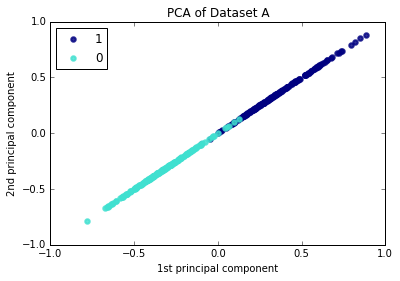

In [113]:
#Plot Dataset A With PCA
colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0, 1], target_namesA):
    plt.scatter(XaxisA[yaxisA == i, 0], XaxisA[yaxisA == i, 0], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Dataset A')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

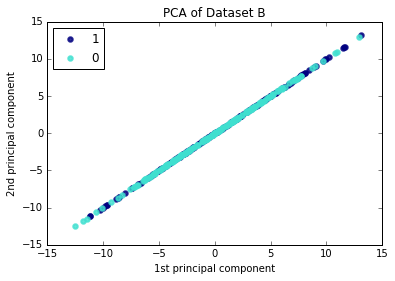

In [121]:
#Plot Dataset B With PCA
XaxisB = dataB[:,0:2]
yaxisB = dataB[:,2]
target_namesB = labB
pcaB = PCA(n_components=2) #this defines object that finds the largest 2 principal directions
pcaB.fit(XaxisB) # fit to data
XaxisB = pcaB.transform(XaxisB) # reduction

colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0, 1], target_namesB):
    plt.scatter(XaxisB[yaxisB == i, 0], XaxisB[yaxisB == i, 0], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA of Dataset B')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")

### LDA

In this section, we are going to apply LDA dimension reduction to both datasets. First we can separate between dimension and label. Then we can apply LDA with the number of components 2 and fit it to our dimension data with the label. Then we can transform it to proceed the reduction dimension. 

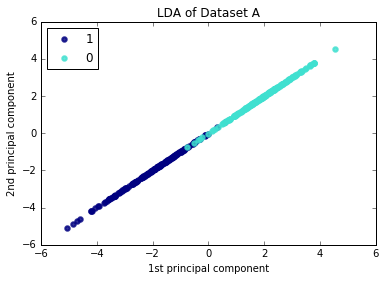

In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
xaxisLda = dataA[:,0:2]
yaxisLda = dataA[:,2]
target_names = labA

lda = LinearDiscriminantAnalysis(n_components=2)
xaxisLda = lda.fit(xaxisLda, yaxisLda).transform(xaxisLda)
#xaxisLda = np.reshape(xaxisLda, (-1, 2))
colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(xaxisLda[yaxisLda == i, 0], xaxisLda[yaxisLda == i, 0], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Dataset A')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")


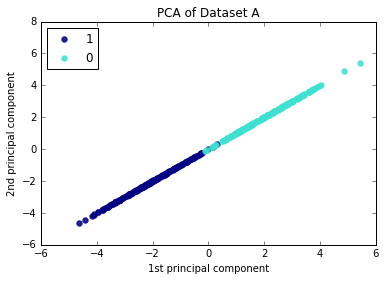

In [117]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
xaxisLdaB = dataB[:,0:2]
yaxisLdaB = dataB[:,2]
target_namesB = labB

ldaB = LinearDiscriminantAnalysis(n_components=2)
xaxisLdaB = ldaB.fit(xaxisLdaB, yaxisLdaB).transform(xaxisLdaB)
#xaxisLda = np.reshape(xaxisLda, (-1, 2))
colors = ['navy', 'turquoise']

for color, i, target_name in zip(colors, [0, 1], target_namesB):
    plt.scatter(xaxisLdaB[yaxisLdaB == i, 0], xaxisLdaB[yaxisLdaB == i, 0], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA of Dataset B')
plt.xlabel("1st principal component")
_ = plt.ylabel("2nd principal component")


### Answer of Question 3:

3. An approach for non-linear dimension is to explore Laplacian Eigenmaps of the data, see http://web.cse.ohio-state.edu/~belkin.8/papers/LEM_NC_03.pdf.  

    1. Read through this article, focusing on Section 1, Section 2, Section 6.1.  
    2. The code below generates and plots the classic swiss roll data set.  Construct the similarity (adjacency) graph for this data.  You can use either the $n$ nearest neighbor nodes, or pick and "$\epsilon$"-neighborhood, see page 5 of the above paper.
    3. Compute the graph Laplacian.  You should explore a few parameters (parameter $t$ on page 6 of the paper)
    4. finally, find the eigenvectors of the graph laplacian, and corresponding eigenvalues.  Project data into eigenspace, using the eigenvectors associated with the 2 smallest eigenvalues.  Plot what the data looks like in this projected space.

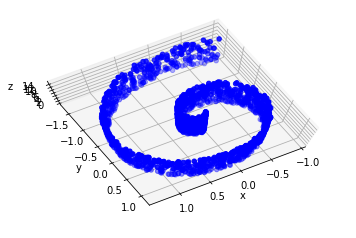

In [275]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

%matplotlib inline

# set parameters
length_phi = 10   # length of swiss roll in angular direction
length_Z = 15     # length of swiss roll in z direction
sigma = 0.1       # strength of noise
m = 2000          # number of samples

# create dataset
phi = length_phi*np.random.rand(m)
xi = np.random.rand(m)
z = length_Z*np.random.rand(m)
x = 1./6*(phi + sigma*xi)*np.sin(phi)
y = 1./6*(phi + sigma*xi)*np.cos(phi)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x,y,z,c='b',marker='o')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

ax.view_init(80,60) # rotate plot 

In this section, we are going to apply the non-linear dimension to explore Laplacian Eigenmaps from the swiss-roll dataset above. This section will include constructing the similarity (adjacency) graph of this data, compute the laplacian graph and the eigenvector. The final product of this part will be plotted in this space. 

## Adjacency Graph

First of all, we can import all the library that we are going to use to contruct the graph and matrix.

In [276]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn import manifold, datasets
from sklearn.utils import check_random_state
from sklearn.decomposition import PCA
from numpy import linalg as LA

Then we can add the three variables above into one dataframe.

In [277]:
#dataframe
comb = pd.DataFrame(np.column_stack((x,y,z)),columns=['X','Y','Z'])
comb.shape

(2000, 3)

The following code will construct the adjacency matrix from the swiss roll dataset using the nearest neighbor method. We set the neighbor value 30.

In [278]:
#KNN adjacency matrix
# Construct the adjacency matrix from the graph
from sklearn.neighbors import kneighbors_graph
knn = kneighbors_graph(comb.values, n_neighbors=30, mode='distance')
adjacency = knn.tocoo()
adjacency.shape

(2000, 2000)

# Compute the Laplacian Graph

Then we can convert it to array and compute the laplacian graph.

In [279]:
# Convert the matrix into array
matArray = np.array(adjacency.todense())

# Construct the degree matrix
matDiag = np.diag(np.apply_along_axis(arr=matArray,
                                func1d=np.sum,
                                axis=0))
# Compute the graph Laplacian.
Lapl = matDiag - matArray

print(Lapl)

[[10.22712003  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         10.42900174  0.         ...  0.          0.
   0.        ]
 [ 0.          0.         19.45249025 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ... 15.75409732  0.
   0.        ]
 [ 0.          0.          0.         ...  0.         24.50250804
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
  18.58398431]]


Check it using csgraph.laplacian function and produce the same result.

In [280]:
#compute laplacian
from scipy.sparse import csgraph
lapla = csgraph.laplacian(adjacency, normed=False)
lapla.todense()

matrix([[10.22712003,  0.        ,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        , 10.42900174,  0.        , ...,  0.        ,
          0.        ,  0.        ],
        [ 0.        ,  0.        , 19.45249025, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 0.        ,  0.        ,  0.        , ..., 15.75409732,
          0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         24.50250804,  0.        ],
        [ 0.        ,  0.        ,  0.        , ...,  0.        ,
          0.        , 18.58398431]])

## Compute Eigenvector

Now, we will compute the eigenvector and plotted the result in this space.

In [281]:
eigen_val, eigen_vec = np.linalg.eig(Lapl)

In [282]:
eigen_val.shape

(2000,)

Now, we can project the graph using PCA method.

In [286]:
# constructing a projection matrix
eigen_pairs = [(np.abs(eigen_val[i]), eigen_vec[:,i]) for i in range(len(eigen_val))]
#sort
eigen_pairs.sort(reverse = True)
# print eigen_pairs
z = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))
print (z)

[[ 1.64961688e-07+0.j -2.13550505e-03+0.j]
 [-6.93300091e-12+0.j -1.60208586e-05+0.j]
 [ 3.56517012e-11+0.j -1.57265343e-04+0.j]
 ...
 [ 2.09189258e-14+0.j -2.32358590e-05+0.j]
 [ 2.15476166e-07+0.j -3.04117297e-02+0.j]
 [ 1.22951560e-03+0.j -3.18033348e-02+0.j]]


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:553: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


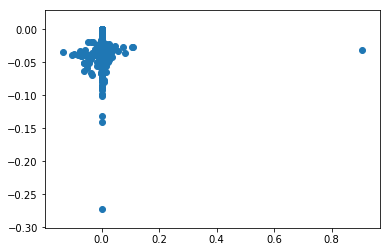

In [304]:
PCA_X = pd.DataFrame(comb.dot(z))
PCA_X.columns = ['PC 1', 'PC 2']
plt.scatter(PCA_X['PC 1'], PCA_X['PC 2'])